<a href="https://colab.research.google.com/github/SomaPrasadSahoo/RiceImage/blob/main/Rice_image_Kaggle_75K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.18.0
GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"somaprasadsahoo","key":"84ae611d6a7c6059d0c65f377d8af236"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets list

ref                                                                    title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
atharvasoundankar/chocolate-sales                                      Chocolate Sales Data 📊🍫                             14KB  2025-03-19 03:51:40           7323        119  1.0              
abdulmalik1518/mobiles-dataset-2025                                    Mobiles Dataset (2025)                              20KB  2025-02-18 06:50:24          13844        248  1.0              
atharvasoundankar/global-water-consumption-dataset-2000-2024           Global Water Consumption Dataset (2000-2024) 🌍💧     17KB  2025-03-17 04:50:38           1701         30  1.0              
aniruddhawankhede/mental-heath

In [5]:
!kaggle datasets download -d muratkokludataset/rice-image-dataset
!unzip rice-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (55).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (550).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5500).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5501).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5502).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5503).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5504).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5505).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5506).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5507).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5508).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5509).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (551).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5510).jpg  
  inflating: Rice_Image_Dataset/Karacadag/K

Import Modules

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

sns.set(style= "darkgrid", color_codes = True)

Add corresponding labels to image data

In [7]:
data_path= "/content/Rice_Image_Dataset"
images, labels= [], []

for subfolder in os.listdir(data_path):
  subfolder_path = os.path.join(data_path, subfolder)
  if os.path.isdir(subfolder_path):

    for image_file in os.listdir(subfolder_path):
      image_path = os.path.join(subfolder_path, image_file)
      images.append(image_path)
      labels.append(subfolder)

df = pd.DataFrame({"image_path": images, "label": labels})
df.head()

,image_path,label
0,/content/Rice_Image_Dataset/Basmati/basmati (1...,Basmati
1,/content/Rice_Image_Dataset/Basmati/basmati (2...,Basmati
2,/content/Rice_Image_Dataset/Basmati/basmati (1...,Basmati
3,/content/Rice_Image_Dataset/Basmati/basmati (1...,Basmati
4,/content/Rice_Image_Dataset/Basmati/basmati (7...,Basmati


Data Exploration

In [11]:
img=cv2.imread(df.image_path[0])
img.shape

(250, 250, 3)

Data Visualization

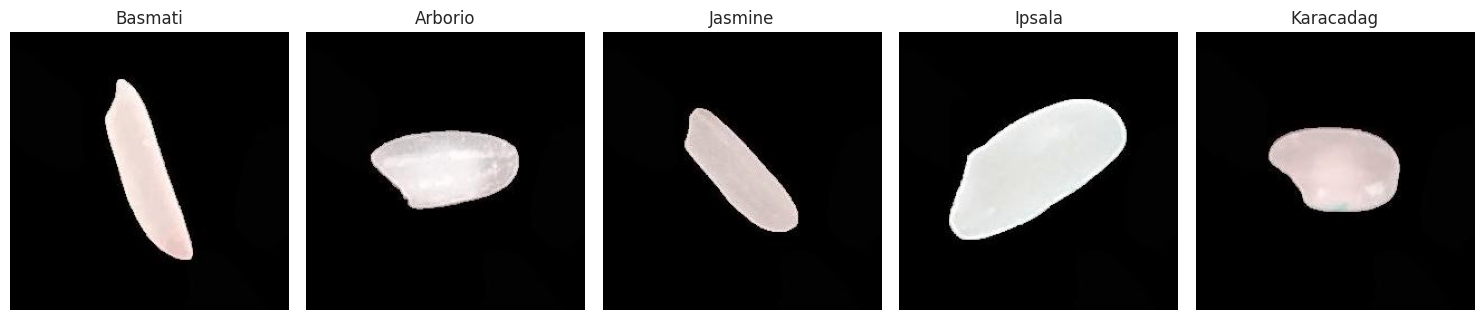

In [12]:
fig, ax = plt.subplots(1,5,figsize=(15,10))
for index, label in enumerate(df.label.unique()):
  img = df[df["label"] == label]["image_path"].iloc[0]
  img = cv2.imread(img)
  ax[index].imshow(img)
  ax[index].set_title(label)
  ax[index].axis("off")

plt.tight_layout()
plt.show()


<Figure size 1000x500 with 0 Axes>

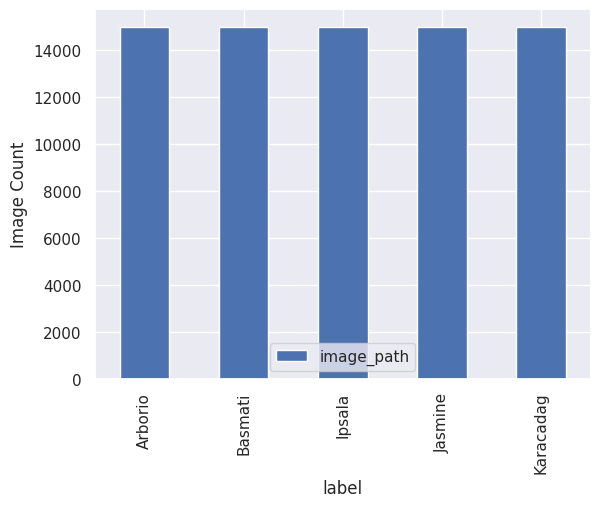

In [13]:
plt.figure(figsize=(10,5))
df.groupby("label").count().plot(kind="bar")
plt.ylabel("Image Count")
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["label"])

print("origin shape: ", df.shape)
print("train shape: ", train_df.shape)
print("test shape: ", test_df.shape)

origin shape:  (75000, 2)
train shape:  (60000, 2)
test shape:  (15000, 2)


Get Train, Validation and Test Dataset

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="image_path",
    y_col="label",
    target_size=(64,64),
    batch_size=256,
    class_mode="categorical",
    subset="training",
    shuffle=True
)

val_data_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="image_path",
    y_col="label",
    target_size=(64,64),
    batch_size=256,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

test_data_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col="image_path",
    y_col="label",
    target_size=(64,64),
    batch_size=256,
    class_mode="categorical",
    shuffle=False
)

Found 48000 validated image filenames belonging to 5 classes.
Found 12000 validated image filenames belonging to 5 classes.
Found 15000 validated image filenames belonging to 5 classes.


In [16]:
train_data_generator.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

CNN Modelling with Keras

Import necessary packages

In [18]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.regularizers import l1_l2

!pip install keras-tuner -q
from kerastuner.tuners import RandomSearch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.4 MB/s eta 0:00:00


<ipython-input-18-7c672bd9113d>:8: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [22]:
train_data_generator[0]

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.00012076, 0.00012076, 0.00012076]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

Hyperparameter tuning using keras tuner

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = Sequential()

    # First Conv Layer
    model.add(Conv2D(filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=32),
                     kernel_size=hp.Choice('conv_1_kernel', values=[3,5]),
                     activation='relu',
                     input_shape=(64, 64, 3),
                     kernel_regularizer=l1_l2(0.0001, 0.0001)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Additional Conv Layers (Variable Number)
    for i in range(hp.Int('conv_layers', 1, 3)):
        model.add(Conv2D(filters=hp.Int('conv_2_filter', min_value=16, max_value=64, step=16),
                         kernel_size=hp.Choice('conv_2_kernel', values=[3,5]),
                         activation='relu',
                         kernel_regularizer=l1_l2(0.0001, 0.0001)))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
        model.add(Dropout(0.25))

    # Flatten Layer
    model.add(Flatten())

    # Fully Connected Layer
    model.add(Dense(units=hp.Int('dense_1_units', min_value=64, max_value=128, step=32),
                    activation='relu'))
    model.add(Dropout(0.5))

    # **Updated Output Layer for Multi-Class Classification**
    model.add(Dense(5, activation='softmax'))  # ✅ Changed to 5 classes

    # **Updated Loss Function**
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
                  loss='categorical_crossentropy',  # ✅ Updated loss for multi-class
                  metrics=['accuracy'])

    return model

# Hyperparameter Tuning with RandomSearch
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='project',
    project_name='Gender_Classification'
)

# ✅ Ensure Data Generator Uses Categorical Labels
tuner.search(train_data_generator, epochs=30, validation_data=val_data_generator)

# Show Best Parameters
tuner.results_summary()
best_params = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best parameters: \n", best_params.values)

# Best Model
best_model = tuner.get_best_models()[0]

Reloading Tuner from project/Gender_Classification/tuner0.json

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
96                |128               |conv_1_filter
3                 |5                 |conv_1_kernel
2                 |2                 |conv_layers
48                |16                |conv_2_filter
3                 |5                 |conv_2_kernel
96                |128               |dense_1_units
0.001             |0.01              |learning_rate



KeyboardInterrupt: 

Model Training

In [30]:
model = Sequential()

model.add(Conv2D(filters=32,
                     kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(64, 64, 3),
                     kernel_regularizer = l1_l2(0.0001, 0.0001)))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(filters=64,
                      kernel_size=(3, 3),
                      activation='relu',
                      kernel_regularizer = l1_l2(0.0001, 0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128,
                      kernel_size=(3, 3),
                      activation='relu',
                      kernel_regularizer = l1_l2(0.0001, 0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
model.add(Dropout(0.25))



model.add(Flatten())
model.add(Dense(units=256,
                   activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer=Adam(1e-3),
                  loss='categorical_crossentropy',
                  metrics = ["accuracy"])
#
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 29, 29, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 13, 13, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 13, 13, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       1,605,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,733,445 (6.61 MB)

 Trainable params: 1,733,061 (6.61 MB)

 Non-trainable params: 384 (1.50 KB)

In [31]:
import time

# Start Timer
start_time = time.time()

# Train Model
results = model.fit(train_data_generator, epochs=30, validation_data=val_data_generator)

# End Timer
end_time = time.time()

# Calculate Total Training Time
total_time = end_time - start_time
print(f"Total Training Time: {total_time:.2f} seconds")

Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 142s 705ms/step - accuracy: 0.4377 - loss: 1.8370 - val_accuracy: 0.1978 - val_loss: 18.0381
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 109s 564ms/step - accuracy: 0.8039 - loss: 0.7352 - val_accuracy: 0.2527 - val_loss: 18.4625
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 106s 563ms/step - accuracy: 0.9028 - loss: 0.4852 - val_accuracy: 0.5619 - val_loss: 2.5438
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 105s 562ms/step - accuracy: 0.9383 - loss: 0.3637 - val_accuracy: 0.7756 - val_loss: 1.5771
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 142s 562ms/step - accuracy: 0.9590 - loss: 0.2767 - val_accuracy: 0.9729 - val_loss: 0.2241
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 106s 567ms/step - accuracy: 0.9633 - loss: 0.2463 - val_accuracy: 0.9148 - val_loss: 0.3107
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 104s 554ms/step - accuracy: 0.9667 - loss: 0.2157 - val_accuracy: 0.9563 - val_loss: 0.2278
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 102s 542ms/step - accuracy: 0.9702

In [32]:
model.save('/content/CNN_model.h5')

In [33]:
model = load_model('/content/CNN_model.h5')

Visualization of Model Result

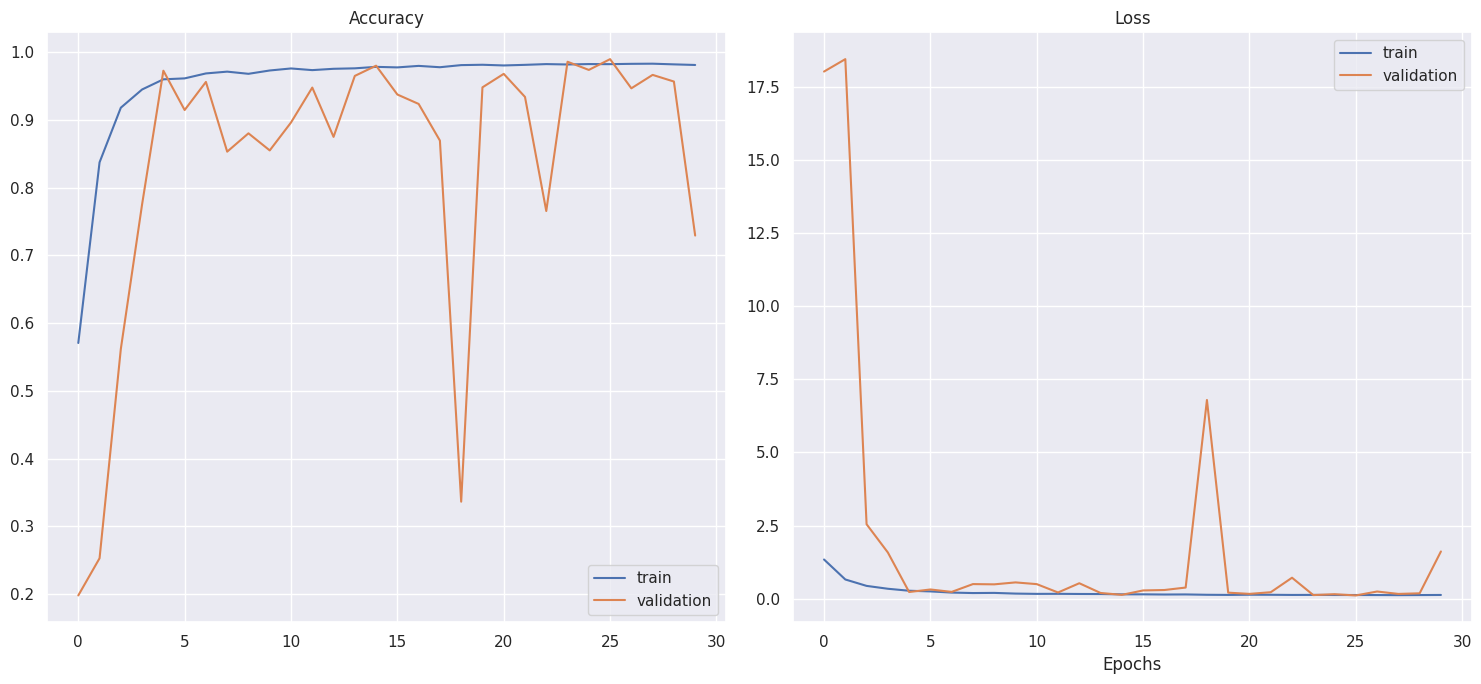

In [35]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].plot(results.history["accuracy"], label="train")
ax[0].plot(results.history["val_accuracy"], label="validation")
ax[0].set_title("Accuracy")
ax[0].legend()

ax[1].plot(results.history["loss"], label="train")
ax[1].plot(results.history["val_loss"], label="validation")
ax[1].set_title("Loss")
ax[1].legend()

plt.xlabel("Epochs")
plt.tight_layout()
plt.show()

In [36]:
loss, accuracy = model.evaluate(test_data_generator)

print("Test Loss: ", loss)
print("Test Accuracy: ", accuracy)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


59/59 ━━━━━━━━━━━━━━━━━━━━ 11s 166ms/step - accuracy: 0.3756 - loss: 9.0962
Test Loss:  9.165329933166504
Test Accuracy:  0.37166666984558105


59/59 ━━━━━━━━━━━━━━━━━━━━ 11s 169ms/step


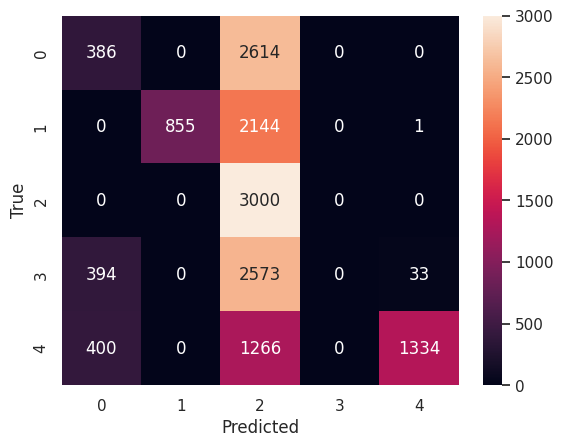

In [37]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(test_data_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = test_data_generator.classes

sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()